# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 1</span>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({
    'font.family':'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,
    'axes.axisbelow': True,
    'figure.figsize': [6.0, 6.0],
    'axes.labelsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'font.size':15,
    'savefig.directory':'./Images'
})

----
### Exercise 1.1
----

- Test the Pseudo-Random Number generator downloaded from the NSL Ariel web site by estimating:

1. $\langle r \rangle = \int_0^1 r dr = 1/2$. Make a picture of the estimation of $\langle r \rangle$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle r \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties).

2. $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Make a picture of the estimation of $\sigma^2$ and its uncertainty (which corresponds to Standard Deviation of the mean for the estimation of $\langle (r-1/2)^2 \rangle$) with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties).

3. Divide $[0,1]$ into $M$ identical sub-intervals and implement the $\chi^2$ test. Obviously, the number of expected events observed in each sub-interval after $n$ *throws*, according to a uniform distribution, is $np = n\times 1/M= n/M$. Fix $M=10^2$ and use for $n$ the first $10^4$ pseudo-random numbers, then the successive $10^4$ pseudo-random numbers, and so on ... 100 times. Plot $\chi^2_j$ for $j=1, ..., 100$. In this case the chi-square statistic is:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$

### Soluzione

In questo esercizio ho utilizzato la classe `Random` che implementa nel suo metodo `Rannyu()` la generazione di numeri psuedo-casuali nell'intervallo $[0,1)$. Per tutte le richieste di questo e di molti degli esercizi a venire ho fatto uso del **data-blocking** delle grandezze misurate. Il data-blocking, come suggerisce il nome, consiste nel raggruppmento di $L$ misure in $N$ blocchi separati, aventi ognuno il proprio valor medio per una qualche osservabile $x$:
$$\langle x\rangle_b=\frac{1}{L}\sum_{i=1}^Lx_i$$ 
Il valor medio di ciascun blocco risulta essere quindi la misura stessa effettuata nel blocco e complessivamente si avrà accesso al valore medio della media $\langle x\rangle$ avente varianza $\sigma$:
$$\langle x\rangle=\frac{1}{N}\sum_{i=1}^N\langle x\rangle_{b_i}$$ 
$$\sigma=\sqrt{\frac{1}{N-1}(\langle x^2\rangle -\langle x\rangle^2)}$$
Viene riportato quindi l'andamento in funzione del numero di blocchi considerati delle grandezze $\langle r\rangle$ e $\langle \left(r-\frac{1}{2}\right)^2\rangle$, dove $r\in[0,1)$, con le relative incertezze. Poichè per entrambe le grandezze è possibile valutare analiticamente il valore atteso si mostra il discostamento da esso($\frac{1}{2}$ nel caso di $\langle r\rangle$, $\frac{1}{12}$ nel caso di $\langle\left(r-\frac{1}{2}\right)^2\rangle$)

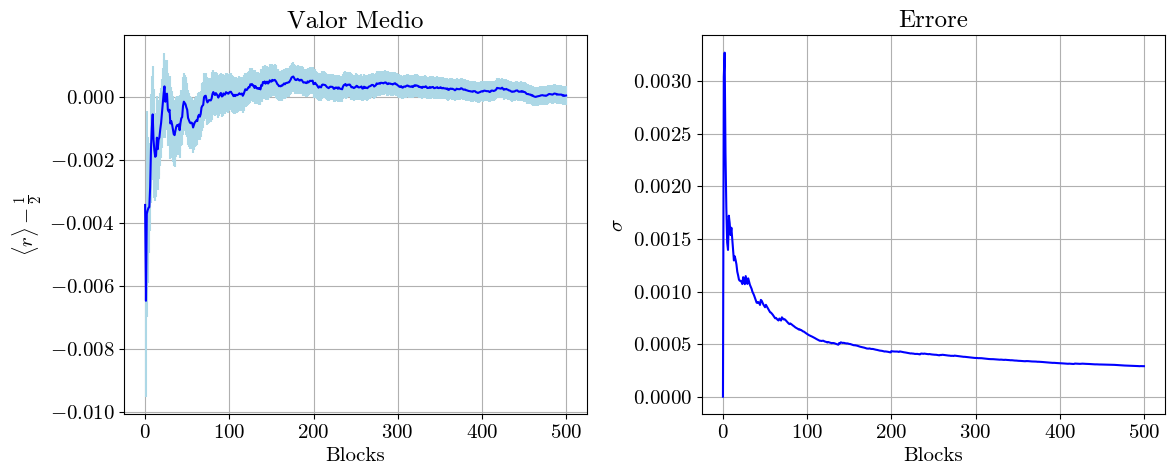

In [27]:
r = np.loadtxt("./1.1/Data.txt",delimiter='\t',skiprows=0)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.errorbar(r[:,0],r[:,1]-0.5,yerr=r[:,2],color='b',ecolor='lightblue')
plt.xlabel('Blocks')
plt.ylabel('$\langle r \\rangle - \\frac{1}{2}$')
plt.title('Valor Medio')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(r[:,0],r[:,2],color='b')
plt.xlabel('Blocks')
plt.ylabel('$\sigma$')
plt.grid(True)
plt.title('Errore')
plt.tight_layout()
plt.show()

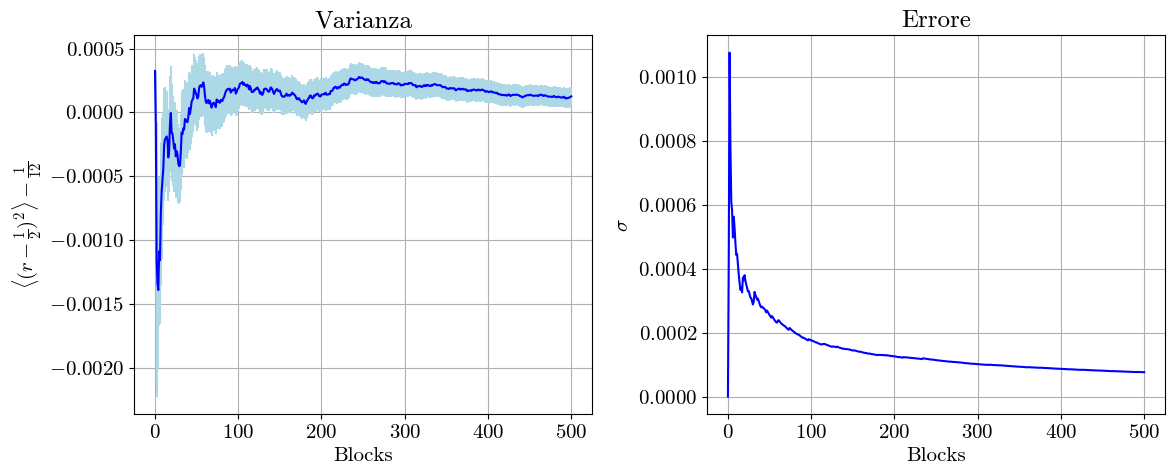

In [28]:
r2 = np.loadtxt("./1.1/Data2.txt",delimiter='\t',skiprows=0)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.errorbar(r2[:,0],r2[:,1]-1/12,yerr=r2[:,2],color='b',ecolor='lightblue')
plt.xlabel('Blocks')
plt.ylabel('$\langle (r-\\frac{1}{2})^2 \\rangle - \\frac{1}{12}$')
plt.title('Varianza')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(r2[:,0],r2[:,2],color='b')
plt.xlabel('Blocks')
plt.ylabel('$\sigma$')
plt.grid(True)
plt.title('Errore')
plt.tight_layout()
plt.show()

Una trattazione simile la si può fare per la stima del $\chi^2$ della distribuzione di probabilità. Il conteggio dei valori $r$ che ricadono in ciascuno degli $M=100$ intervalli in cui $[0,1]$ è stato suddiviso diventa l'osservabile $x$ di cui viene valutato il valor medio totale. Si estrae quindi il valore di $\chi^2$:
$$\chi^2=\sum_{i=0}^M\frac{(n_i-n/M)^2}{n/M}$$
Viene riportata sotto la distribuzione dei valori di $\chi^2$ ottenuti

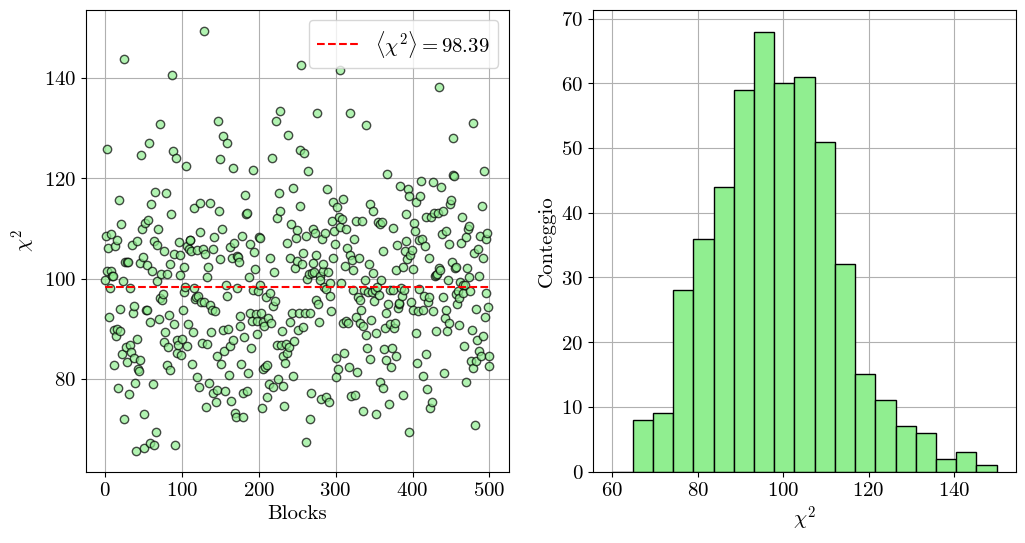

In [50]:
chi = np.loadtxt("./1.1/Data3.txt",delimiter='\t',skiprows=0)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(chi[:,0],chi[:,1],color='lightgreen',edgecolors='black',alpha=0.7)
plt.plot(chi[:,0],np.ones(len(chi[:,0]))*np.mean(chi[:,1]),color='r',linestyle='--',label='$\langle \chi^2\\rangle =$'+'{:.2f}'.format(np.mean(chi[:,1])))
plt.xlabel('Blocks')
plt.ylabel('$\chi^2$')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.grid()
plt.hist(chi[:,1],bins='auto',color='lightgreen',edgecolor='black',range=(60,150))
plt.ylabel('Conteggio')
plt.xlabel('$\chi^2$')
plt.show()

Parametri dei plot:
- $10^5$ lanci
- $5\cdot10^2$ blocchi
- $10^4$ ripetizioni (1.3)

----
### Exercise 1.2
----

- Extend Pseudo-Random Number generator downloaded from the NSL Ariel web site and check the Central Limit Theorem:
1. Add two probability distributions by using the **method of the inversion of the cumulative distribution** to sample from a generic exponential distribution, $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Exponential_distribution">this Wikipedia link</a>), and a generic Cauchy-Lorentz distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (see <a href="https://en.wikipedia.org/wiki/Cauchy_distribution">this Wikipedia link</a>).
2. Make 3 pictures with the histograms obtained filling them with $10^4$ realizations of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (for $N=1, 2, 10, 100$), being $x_i$ a random variable sampled throwing a *standard* dice (fig.1), an *exponential* dice (fig.2, use $\lambda=1$) and a *Lorentzian* dice (fig.3, use $\mu=0$ and $\Gamma=1$).

Note that you can try to fit the case $N=100$ with a Gaussian for standard and exponential dices, whereas you should use a Cauchy-Lorentz distribution for the last case.

### Soluzione 1.2.1
Il metodo di **Inversione della funzione Comulativa** permette di campionare una generica distribuzione di probabilità $p(x)$ di cui si sia in grado di calcolare la primitiva e invertirla. La funzione comulativa sarà quindi:
$$F(x)=\int_{-\infty}^xp(t)dt$$
Tale funzione ha il codominio coincidente con l'intervallo $[0,1]$. Per ottenere dei valori distribuiti secondo $p(x)$ occore quindi valutare:
$$x=F^{-1}(y)$$ 
con $y$ distribuita uniformemente nell'intervallo $[0,1)$

Vengono riportati in figura i campionamenti di un esponenziale e una distribuzione di Cauchy-Lorentz ottenute con il metodo di inversione della funzione comulativa:
- Esponenziale:
    $$p(x)=\lambda e^{-\lambda x}$$
    $$F(x)=1-e^{-\lambda x}$$
    $$x=-\frac{1}{\lambda}\ln(1-y)$$
- Cauchy-Lorentz:
    $$p(x)=\frac{\Gamma}{\pi}\frac{1}{(x-\mu)^2+\Gamma^2}$$
    $$F(x)=\frac{1}{\pi} \arctan\left(\frac{x-\mu}{\Gamma}\right)+\frac{1}{2}$$
    $$x=\mu+\Gamma\tan\left[\pi\left(y-\frac{1}{2}\right)\right]$$

In [5]:
color=['orange','lightgreen','purple','lightblue']
s =['1','2','10','100']
def cl(x,m,g):
    return g/(((x-m)**2 +g**2)*np.pi)
def gauss(x,m,s):
    return np.exp(-((x-m)**2)/(2*s*s))/np.sqrt(2*np.pi*s*s)

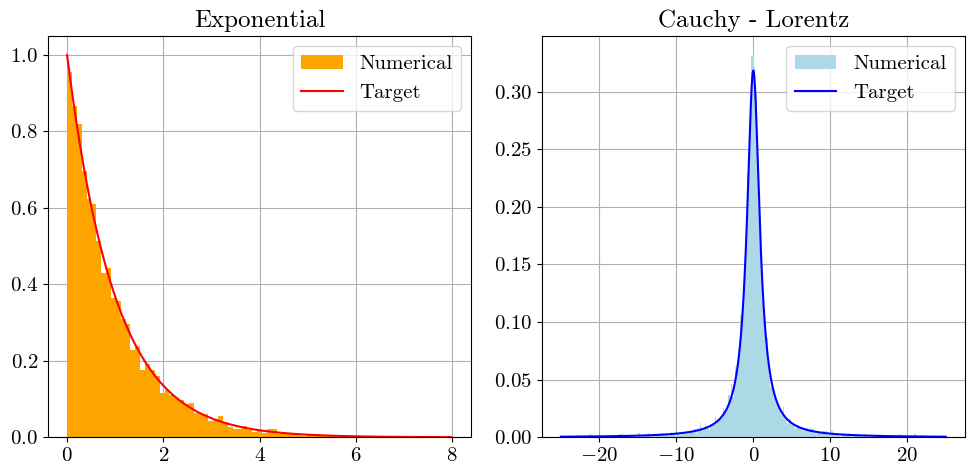

In [6]:
plt.figure(figsize=(10,5))
d = np.loadtxt("./1.2/Data.txt",delimiter='\t',skiprows=0)
plt.subplot(1,2,1)
plt.hist(d[:,0],bins='auto',range=(0,8),color='orange',density=True,label='Numerical')
x = np.arange(0,8,0.01)
plt.plot(x,np.exp(-x),color='r',label='Target')
plt.title('Exponential')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.hist(d[:,1],bins='auto',range=(-25,25),color='lightblue',density=True,label='Numerical')
x = np.arange(-25,25,0.01)
plt.plot(x,cl(x,0,1),color='b',label='Target')
plt.title('Cauchy - Lorentz')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

#### Soluzione 1.2.2
Il **Teorema del Limite Centrale (TLC)** afferma che, dato un set di variabili indipendenti distribuite con valor medio e varianza finiti, la somma di queste seguirà una distribuzione Gaussiana con valor medio e varianza dati dalla somma delle stesse quantità delle singole variabili.

Nella seconda richiesta di questo esercizio è possibile osservare che le distribuzioni **uniforme** ed **esponenziale** soddisfano le richieste del TLC, e tendono ad una gaussiana. D'altro canto, la somma di $N$ numeri estratti da una distribuzione di probabilità di **Cauchy-Lorentz**, avente varianza infinita, mantiene la stessa distribuzione in quanto non siddisfa le ipotesi del TLC.

Questi comportamenti possono essere facilmente notati nelle seguenti immagini

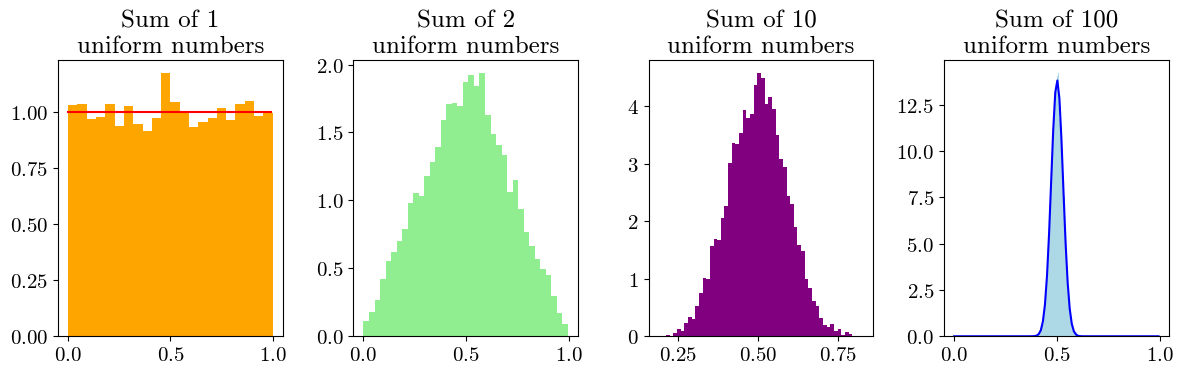

In [7]:
du = np.loadtxt("./1.2/Data_u.txt",delimiter='\t',skiprows=0)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i in range(0,4):
    axes[i].hist(du[:,i+1],bins='auto',color=color[i],density=True)
    axes[i].set_title('Sum of '+s[i]+'\nuniform numbers')
x=np.arange(0.001,1,0.01)
axes[0].plot(x,np.sign(x),color='r')
axes[3].plot(x,gauss(x,0.5,np.sqrt(1/1200)),color='b')
plt.tight_layout()
plt.show()

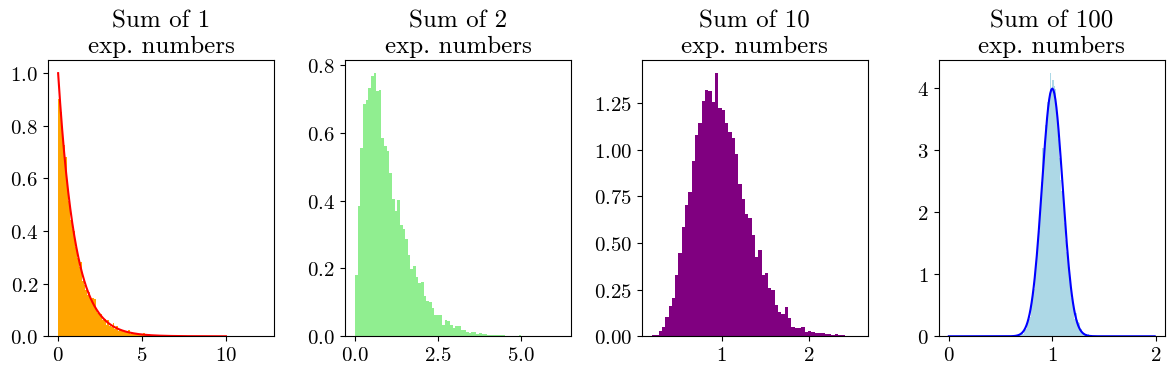

In [8]:
de = np.loadtxt("./1.2/Data_e.txt",delimiter='\t',skiprows=0)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i in range(0,4):
    axes[i].hist(de[:,i+1],bins='auto',color=color[i],density=True)
    axes[i].set_title('Sum of '+s[i]+'\nexp. numbers')
x=np.arange(0,10,0.01)
axes[0].plot(x,np.exp(-x),color='r')
x=np.arange(0,2,0.01)
axes[3].plot(x,gauss(x,1,1/10),color='b')
plt.tight_layout()
plt.show()

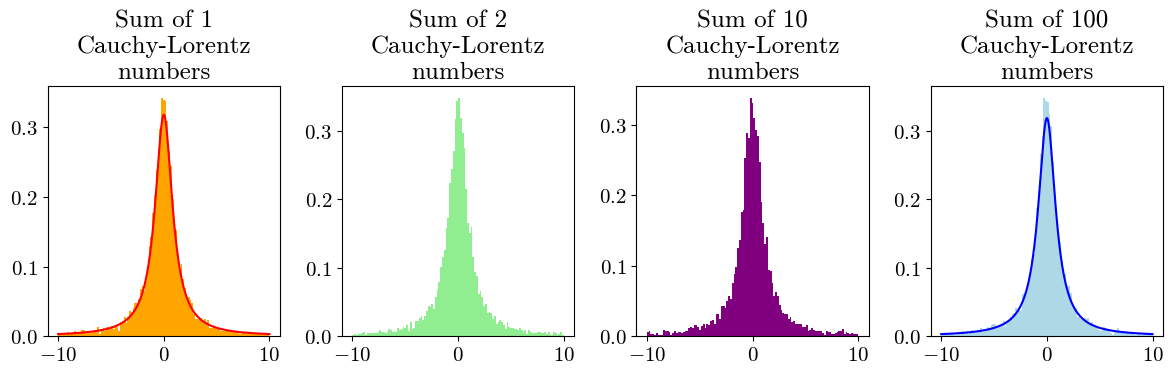

In [9]:
dc = np.loadtxt("./1.2/Data_c.txt",delimiter='\t',skiprows=0)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i in range(0,4):
    axes[i].hist(dc[:,i+1],bins='auto',range=(-10,10),color=color[i],density=True)
    axes[i].set_title('Sum of '+s[i]+'\nCauchy-Lorentz\nnumbers')
x=np.arange(-10,10,0.01)
axes[0].plot(x,cl(x,0,1),color='r')
axes[3].plot(x,cl(x,0,1),color='b')
plt.tight_layout()
plt.show()

----
### Exercise 1.3
----

- **Simulate** the Buffon’s experiment (see LSN_Lecture_00, supplementary material):  A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but do not use $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$
Make a picture of the estimation of $\pi$ and its uncertainty (Standard Deviation of the mean) with a large number of *throws* $M$ as a function of the number of blocks, $N$ (see below: Computing statistical uncertainties). If possible, do not use $\pi$ to evaluate $\pi$.

### Soluzione
Il problema è invariante per traslazioni discrete lungo l'asse x per cui posso ridurmi al problema
tra solo due righe. Date le due righe distanti $d$, considero il punto $p_1$, un estremo del bastoncino,
generato nello spazio tra le due righe. Il problema sta nella genazione nella direzione del
bastoncino. 

Il problema è invariante per traslazioni lungo l'asse $x$, ciò significa che di $p_1$ ci interessa unicamente l'ordinata. 
Per determinare la direzione causale genero punti in un quadrato e seleziono unicamente quelli con distanza minore di 1, normalizzo, ed ecco un versone distribuito isotropicamente.
```cpp
for(int i=0;i<N/M;i++){
    //genero un punto in un quadrato di lato 2
    double x = rnd.Rannyu(-1.,1.);
    double y = rnd.Rannyu(-1.,1.);
    double r = x*x+y*y;
    if(r<=1){                                       //se sta dentro il cerchio di raggio 1
        double py= rnd.Rannyu()*d;                  //genero una y casuale in [0,d)
        double y2=py+L*y/sqrt(r);                   //mi sposto della y rinormalizzata
        c++;
        if(y2>d or y2<0) H++;
    }
}
```

Tramite data-blocking quindi effettuo una misura del conteggio medio di bastoncini che ricadono all'interno delle righe con il relativo errore. Viene riportato sotto l'andamento della differenza tra la simulazione e il valore atteso di $\pi$

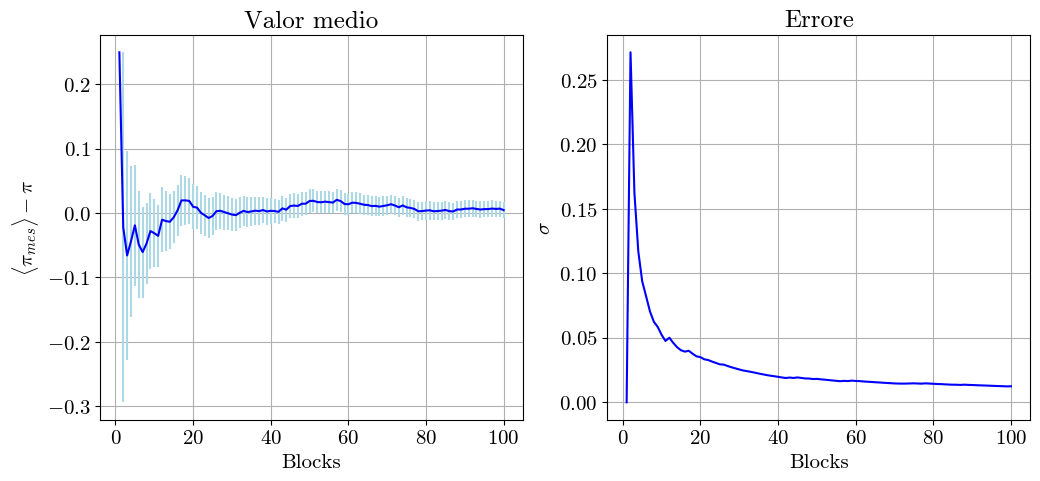

In [10]:
dp = np.loadtxt("./1.3/Data.txt",delimiter='\t',skiprows=1)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
x = np.arange(0,len(dp[:,0]))+1
plt.errorbar(x,dp[:,0]-np.pi,dp[:,1],color='b',ecolor='lightblue')
plt.xlabel('Blocks')
plt.ylabel('$\langle\pi_{mes}\\rangle-\pi$')
plt.title('Valor medio')
plt.grid()
plt.subplot(1,2,2)
plt.plot(x,dp[:,1],color='b')
plt.xlabel('Blocks')
plt.ylabel('$\sigma$')
plt.title('Errore')
plt.grid()
plt.show()

### <span style="color:blue">Computing statistical uncertainties: the blocking method</span>
- A fundamental step in every Monte Carlo calculation is the estimation of its statistical uncertainty, **it's a must!** Your task would not be completed if you had not calculated it.

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    In computing the statistical uncertainties, i.e. the standard deviation of the mean, you need an estimation of the variance $\sigma^2$, the second central moment. First of all note that the variance can be computed from
    $$\sigma^2_A := \langle (A-\langle A\rangle)^2\rangle = \langle A^2 \rangle -\langle A\rangle^2 $$
    What is the best way to estimate $\sigma^2_A$? Imagine that your Monte Carlo estimation of $A$ is obtained from a calculation which uses $M$ Monte Carlo "steps" (intentionally, here I am generic because what is a single "step" in a Monte Carlo calculation strictly depends on the specific calculation); you can always divide such $M$ Monte Carlo "steps" in $N$ blocks, with $N<M$. In each block, you can use your $M/N$ Monte Carlo "steps" to obtain an estimate of $A$, let me call it $A_i$ with $i=1,N$, and then you have also $A^2_i$ with $i=1,N$.
    At this point everything becomes clear:
    $$ \langle A^2 \rangle \simeq \frac{1}{N} \sum_{i=1}^N A^2_i \quad \quad \langle A\rangle^2 \simeq \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 $$
    and finally the statistical uncertainty with $N$ :
    $$\frac{\sigma}{\sqrt{N-1}} \simeq \sqrt{\frac{1}{N-1} \left[ \frac{1}{N} \sum_{i=1}^N A^2_i - \left( \frac{1}{N} \sum_{i=1}^N A_i \right)^2 \right]} $$
</p>

- <font color="blue">In a Monte Carlo calculation, you can use the arguments above to outputting an estimate of A and its statistical uncertainty on the fly, during your calculation. You will be able to do this every $M/N$ steps, and thus, in the end, $N$ times</font>. Note that after the first $M/N$ Monte Carlo steps, at the end of the first block, your estimation of the uncertainty is not computable, so set it to zero and compute it only from the second block. **Question**: $N$ can be chosen in many ways ... what are the limitations regarding this choice?